In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

In [7]:
file = '/Users/roxoho/Downloads/Data-pv/csv-data/DATASET_V1.csv'
df = pd.read_csv(file)

In [9]:
df.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance(Ideal),Temperature,Precipitation,Wind Speed,Wind Direction,Specific Humidity
0,2020,12,31,13,12616.00,361.82,20.77,0.00,2.45,325.65,2.26
1,2020,12,31,14,9053.32,292.41,20.51,0.00,2.43,324.93,2.20
2,2020,12,31,15,7345.00,164.33,19.26,0.00,2.13,326.84,2.20
3,2020,12,31,16,2378.68,40.36,14.96,0.00,2.12,325.08,2.38
4,2020,12,31,17,0.00,0.00,12.08,0.00,2.57,323.79,2.32
5,2020,12,31,18,0.00,0.00,10.73,0.00,2.71,323.92,2.38
6,2020,12,31,19,0.00,0.00,9.67,0.00,2.70,322.87,2.44
7,2020,12,31,20,0.00,0.00,9.14,0.00,2.60,321.58,2.50
8,2020,12,31,21,0.00,0.00,8.93,0.00,2.47,318.20,2.56
9,2020,12,31,22,0.00,0.00,8.76,0.00,2.40,313.81,2.56


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               10232 non-null  int64  
 1   MO                 10232 non-null  int64  
 2   DY                 10232 non-null  int64  
 3   HR                 10232 non-null  int64  
 4   Avg Power          10232 non-null  float64
 5   Irradiance(Ideal)  10232 non-null  float64
 6   Temperature        10232 non-null  float64
 7   Precipitation      10232 non-null  float64
 8   Wind Speed         10232 non-null  float64
 9   Wind Direction     10232 non-null  float64
 10  Specific Humidity  10232 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 879.4 KB


In [13]:
correlation_matrix = df.corr()
target_corr = correlation_matrix['Avg Power'].sort_values(ascending=False)
print(target_corr)

Avg Power            1.000000
Irradiance(Ideal)    0.942041
Temperature          0.478413
Wind Speed           0.243305
Wind Direction       0.212626
HR                   0.034081
YEAR                 0.017635
DY                   0.016382
MO                  -0.023733
Precipitation       -0.056745
Specific Humidity   -0.066584
Name: Avg Power, dtype: float64


In [15]:
feature_columns = ['YEAR','MO','DY', 'HR', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Specific Humidity']
target_column = 'Avg Power'

X = df[feature_columns]
y = df[target_column]

In [17]:

# Assuming X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_forest)}")

Random Forest MSE: 3787667.742528373


In [21]:
comparison_dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
comparison_dfs['Index'] = range(1, len(y_test) + 1)
comparison_dfs.head(50)

,Actual,Predicted,Index
6930,0.00,0.000000,1
518,0.00,0.000000,2
8813,0.00,0.000000,3
8701,6384.68,8239.451200,4
6978,0.00,0.000000,5
7458,3053.00,5401.519200,6
8141,0.00,0.000000,7
2748,14134.00,13918.121500,8
2816,22155.00,21449.174800,9
3614,1844.00,4112.863973,10


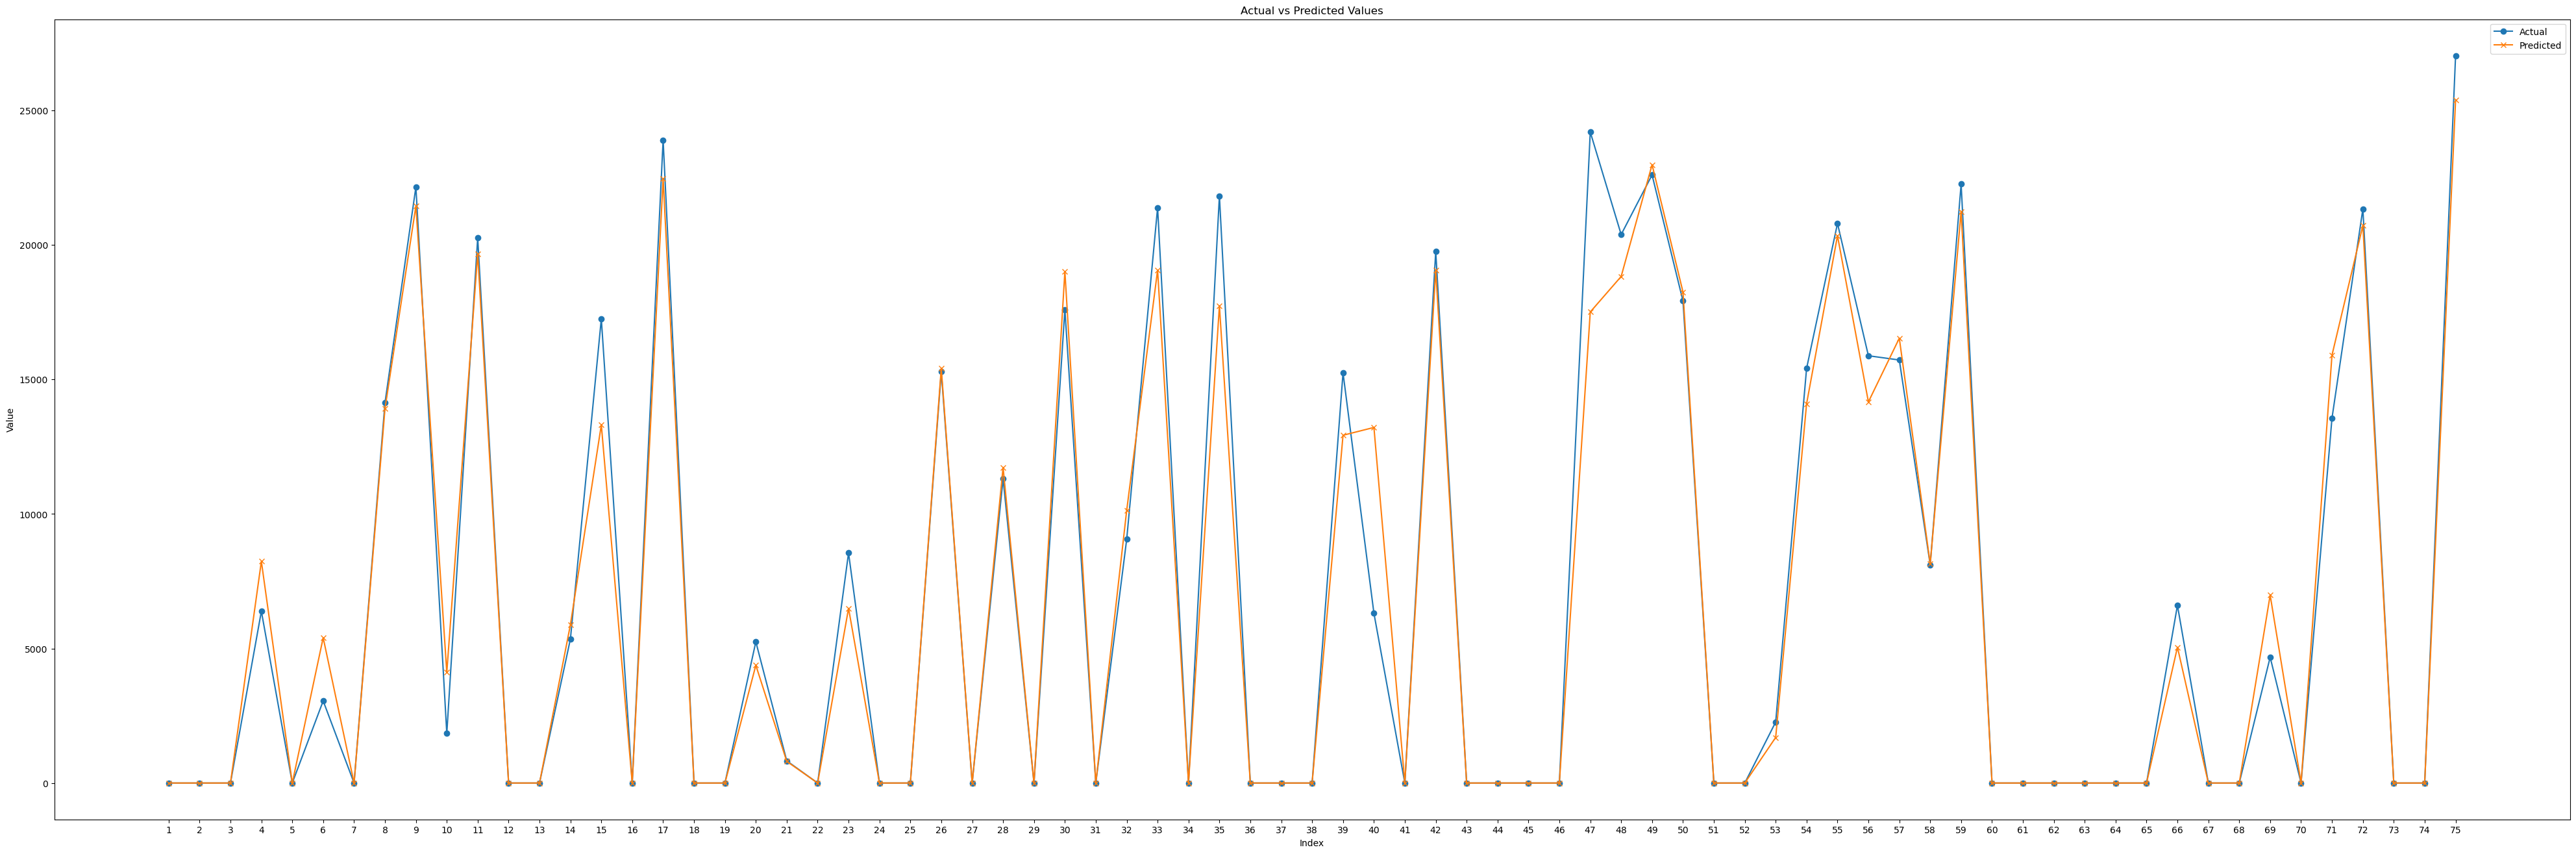

In [30]:
comparison_df=comparison_dfs.head(75)
plt.figure(figsize=(50, 16))
plt.plot(comparison_df['Index'], comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Index'], comparison_df['Predicted'], label='Predicted', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xticks(comparison_df['Index'])
plt.show()

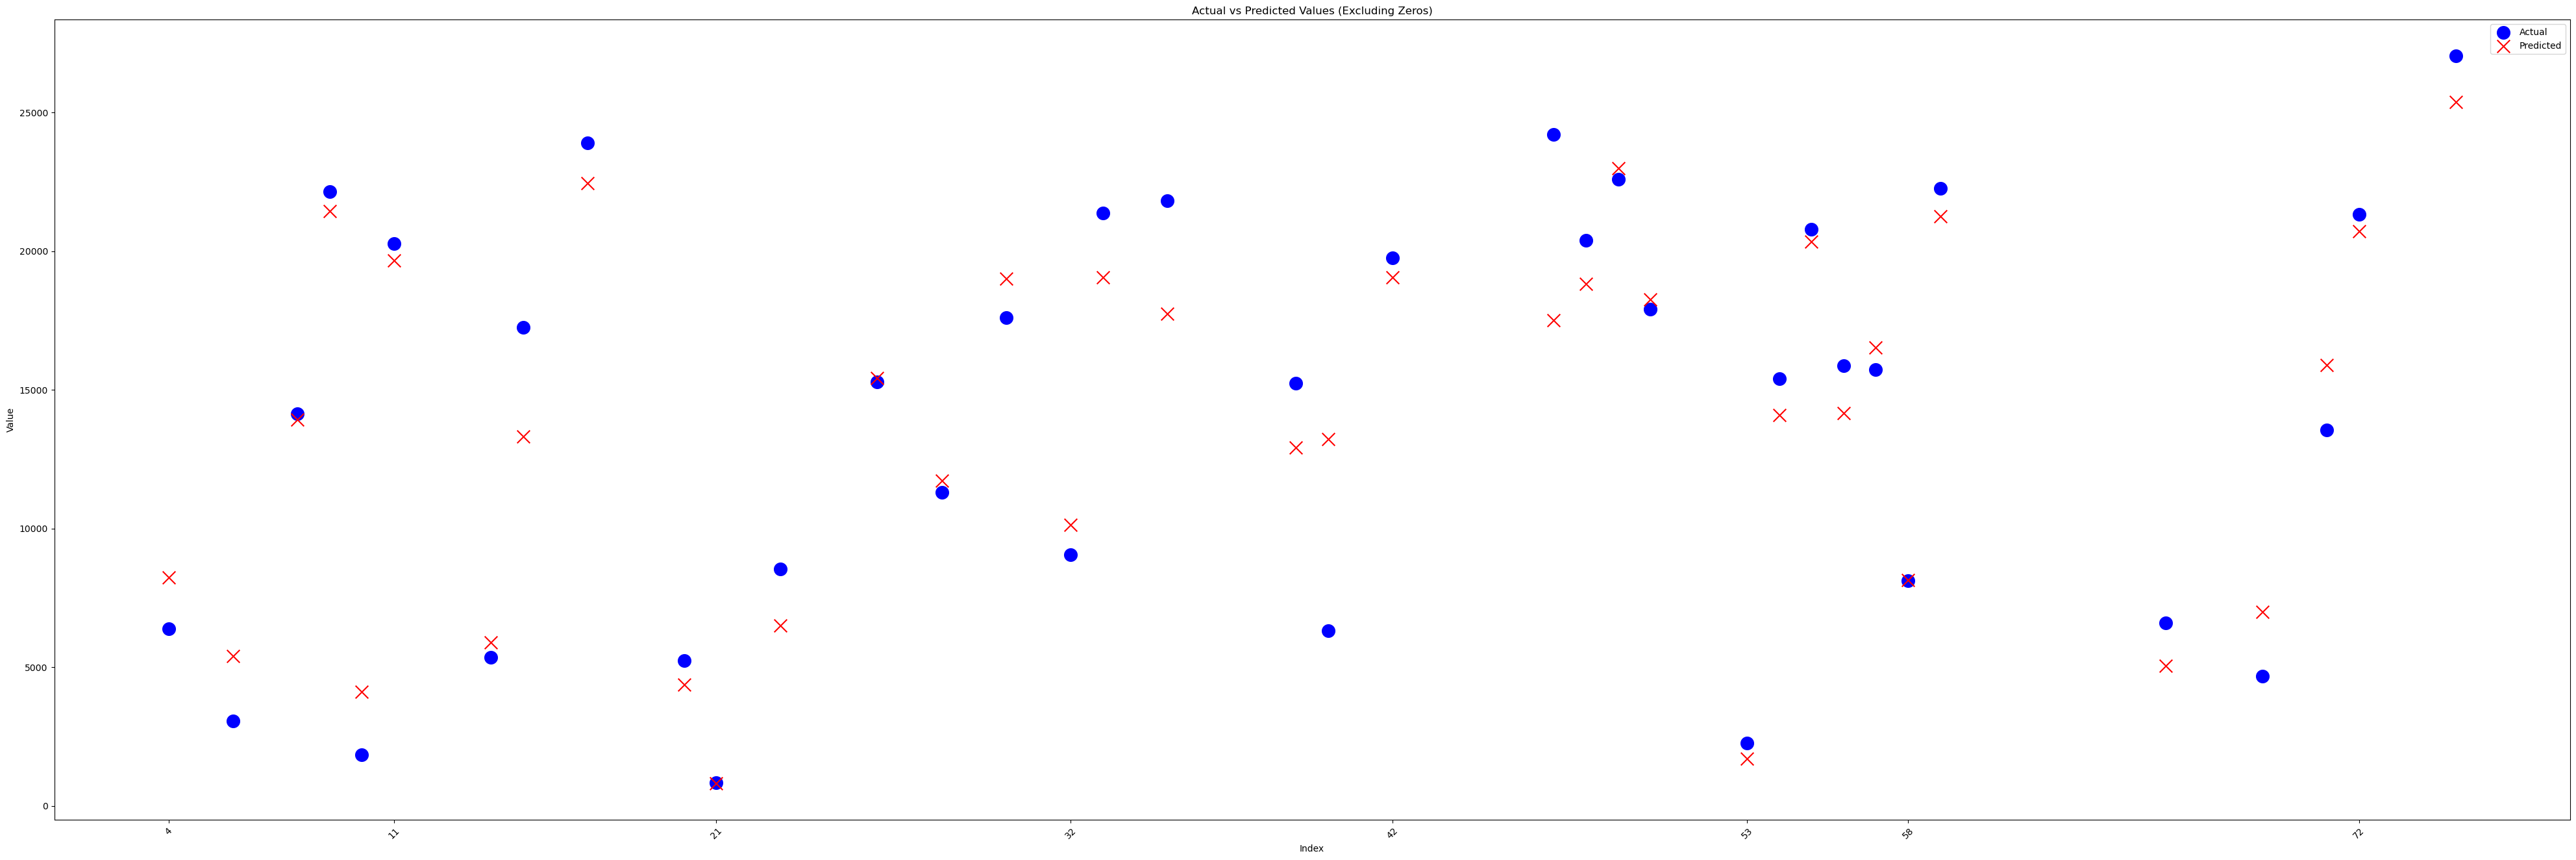

In [62]:

comparison_df = comparison_dfs.head(75)

# Filter out rows where 'Actual' or 'Predicted' are 0
filtered_df = comparison_df[(comparison_df['Actual'] != 0) & (comparison_df['Predicted'] != 0)]

plt.figure(figsize=(50, 16))

# Scatter plot for 'Actual' values with bold circular markers, excluding 0s
plt.scatter(filtered_df['Index'], filtered_df['Actual'], label='Actual', marker='o', s=200, color='blue')

# Scatter plot for 'Predicted' values with bold 'x' markers, excluding 0s
plt.scatter(filtered_df['Index'], filtered_df['Predicted'], label='Predicted', marker='x', s=200, color='red')

# Adding labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Excluding Zeros)')
plt.legend()

# Customize x-ticks if needed (e.g., every 5th tick)
plt.xticks(filtered_df['Index'][::5], rotation=45)

# Show the plot
plt.show()


             Feature  Importance
3                 HR    0.667792
4        Temperature    0.216373
5      Precipitation    0.035913
7     Wind Direction    0.017808
8  Specific Humidity    0.017091
6         Wind Speed    0.016179
1                 MO    0.014239
2                 DY    0.012743
0               YEAR    0.001863


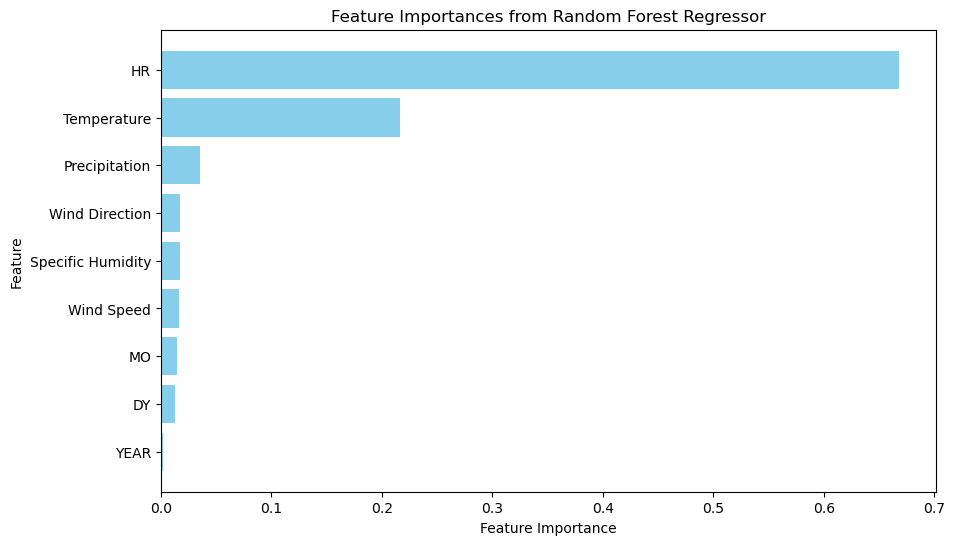

In [68]:

feature_importances = forest_reg.feature_importances_

# Assuming X_train is a DataFrame, you can use:
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [154]:


# trying by settting all column values to 0 for HR between 17 and 6

new_df = df.copy()


In [160]:
new_df.loc[new_df['HR'].between(0, 6) | new_df['HR'].between(17, 23), [ 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Specific Humidity']] = 0


In [162]:
new_df.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance(Ideal),Temperature,Precipitation,Wind Speed,Wind Direction,Specific Humidity
0,2020,12,31,13,12616.00,361.82,20.77,0.00,2.45,325.65,2.26
1,2020,12,31,14,9053.32,292.41,20.51,0.00,2.43,324.93,2.20
2,2020,12,31,15,7345.00,164.33,19.26,0.00,2.13,326.84,2.20
3,2020,12,31,16,2378.68,40.36,14.96,0.00,2.12,325.08,2.38
4,2020,12,31,17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2020,12,31,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2020,12,31,19,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2020,12,31,20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2020,12,31,21,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2020,12,31,22,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [166]:
correlation_matrix = new_df.corr()
target_corr = correlation_matrix['Avg Power'].sort_values(ascending=False)
print(target_corr)

Avg Power            1.000000
Irradiance(Ideal)    0.942041
Temperature          0.834639
Wind Direction       0.762075
Wind Speed           0.718071
Specific Humidity    0.546946
HR                   0.034081
YEAR                 0.017635
DY                   0.016382
Precipitation        0.006147
MO                  -0.023733
Name: Avg Power, dtype: float64


In [142]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               10232 non-null  int64  
 1   MO                 10232 non-null  int64  
 2   DY                 10232 non-null  int64  
 3   HR                 10232 non-null  int64  
 4   Avg Power          10232 non-null  float64
 5   Irradiance(Ideal)  10232 non-null  float64
 6   Temperature        10232 non-null  float64
 7   Precipitation      10232 non-null  float64
 8   Wind Speed         10232 non-null  float64
 9   Wind Direction     10232 non-null  float64
 10  Specific Humidity  10232 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 879.4 KB


In [164]:
feature_columns = ['YEAR','MO','DY', 'HR', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Specific Humidity']
target_column = 'Avg Power'

X = new_df[feature_columns]
y = new_df[target_column]

In [168]:

# Assuming X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_forest)}")

Random Forest MSE: 3909932.0053623295


In [170]:
new_comparison_dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
new_comparison_dfs['Index'] = range(1, len(y_test) + 1)
new_comparison_dfs.head(50)

,Actual,Predicted,Index
6930,0.00,0.000000,1
518,0.00,0.000000,2
8813,0.00,0.000000,3
8701,6384.68,8245.387600,4
6978,0.00,0.000000,5
7458,3053.00,5131.442400,6
8141,0.00,0.000000,7
2748,14134.00,14237.815900,8
2816,22155.00,21081.834600,9
3614,1844.00,4719.208400,10


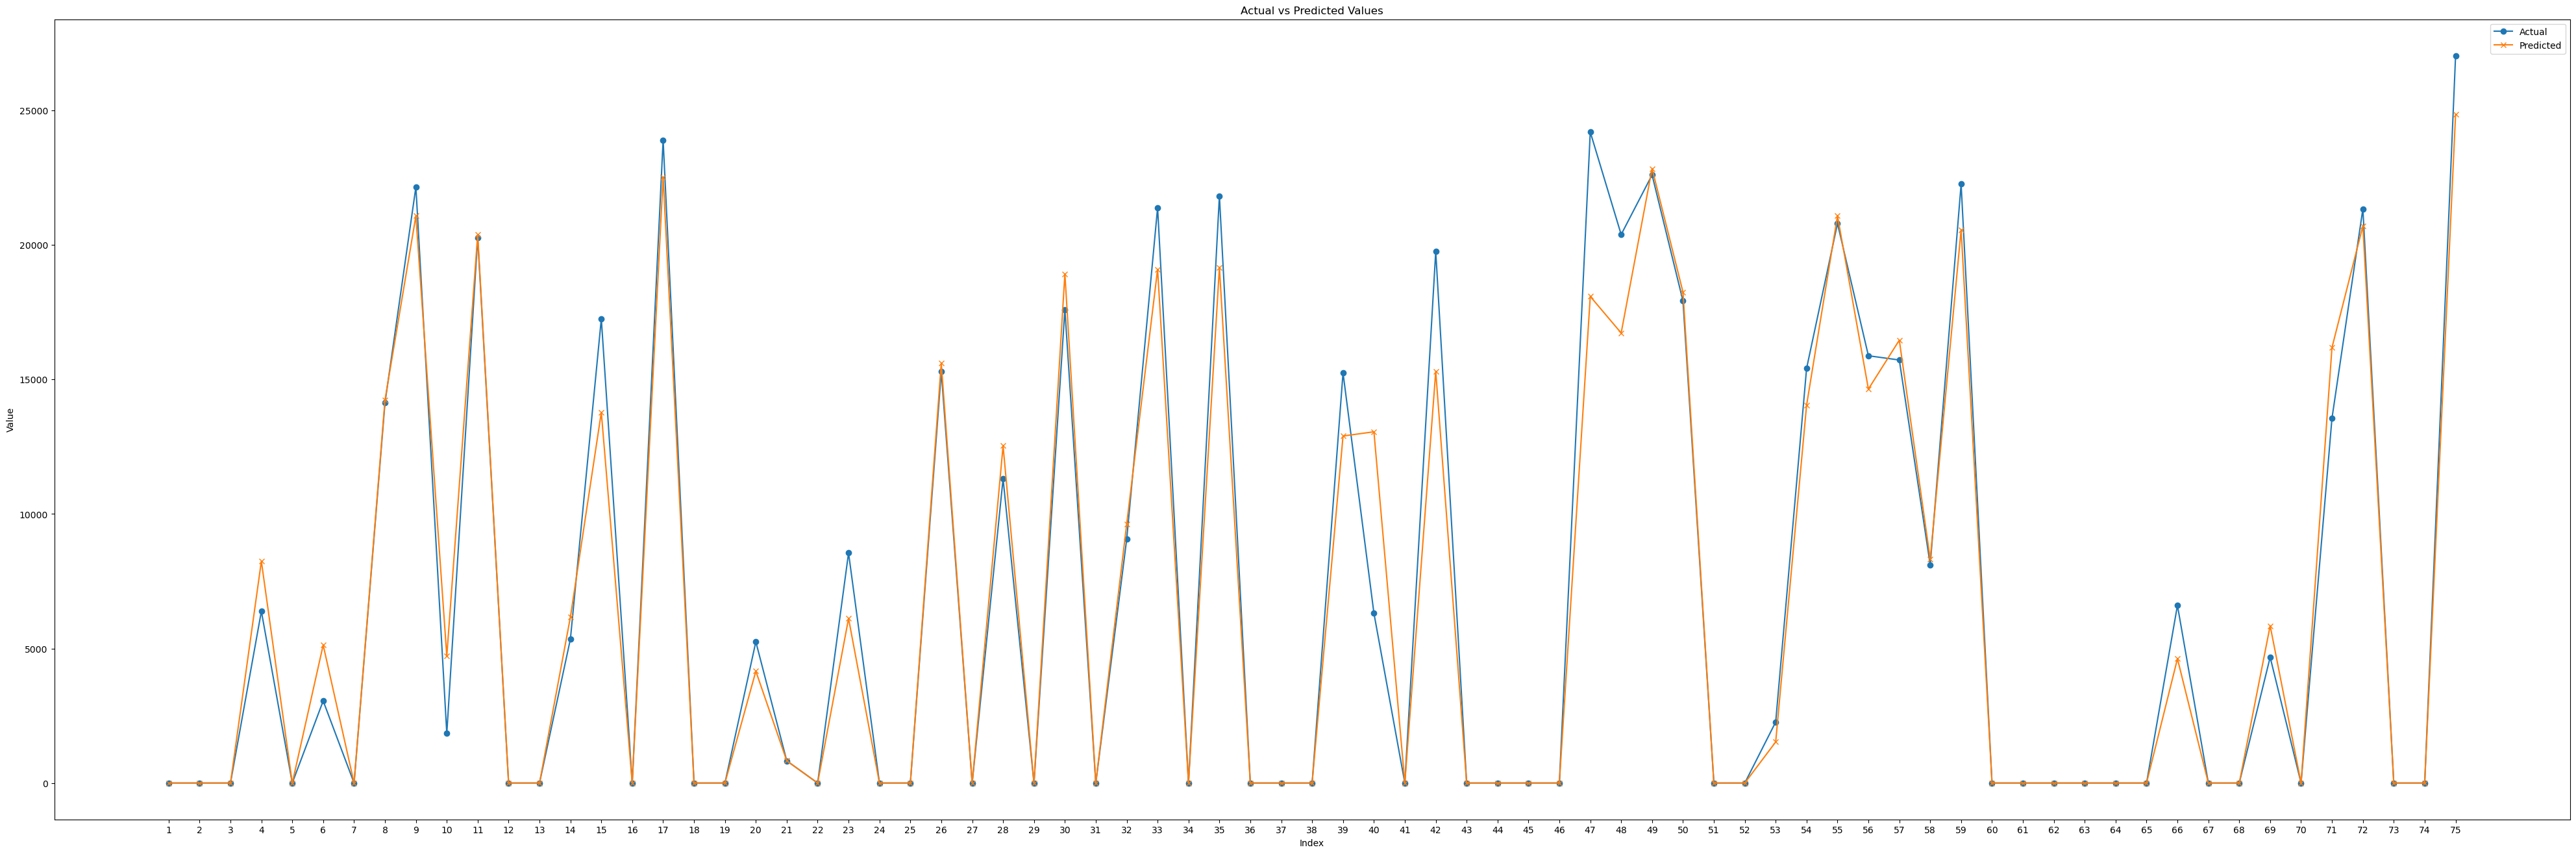

In [172]:
comparison_df= new_comparison_dfs.head(75)
plt.figure(figsize=(50, 16))
plt.plot(comparison_df['Index'], comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Index'], comparison_df['Predicted'], label='Predicted', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xticks(comparison_df['Index'])
plt.show()

In [174]:



# Result without any changes to other columns within HR 17 and 6 is better



In [ ]:

# Trying with more features


In [176]:
# adding more features

features = pd.read_csv('/Users/roxoho/Downloads/Data-pv/csv-data/Features.csv', header=18)

In [178]:
features.head(20)

,YEAR,MO,DY,HR,T2M,QV2M,WD10M,WS10M,WS50M,WD50M,RH2M,PRECTOTCORR,T2MDEW,PS
0,2020,12,31,0,5.59,2.99,327.81,3.31,6.53,327.70,52.50,0.0,-3.27,99.13
1,2020,12,31,1,5.05,3.05,325.60,3.30,6.65,325.53,55.31,0.0,-3.09,99.12
2,2020,12,31,2,4.51,3.11,325.30,3.31,6.80,325.20,58.75,0.0,-2.81,99.10
3,2020,12,31,3,4.12,3.17,323.21,3.37,7.12,323.21,62.12,0.0,-2.44,99.08
4,2020,12,31,4,3.76,3.30,320.08,3.37,7.19,320.03,65.56,0.0,-2.06,99.09
5,2020,12,31,5,3.23,3.36,316.93,3.27,6.87,317.07,69.31,0.0,-1.81,99.10
6,2020,12,31,6,2.77,3.42,312.54,3.21,6.74,312.75,72.25,0.0,-1.68,99.16
7,2020,12,31,7,4.97,3.42,307.52,3.73,6.21,308.00,62.19,0.0,-1.63,99.23
8,2020,12,31,8,7.94,3.42,302.10,3.84,4.25,302.61,50.69,0.0,-1.61,99.30
9,2020,12,31,9,11.83,3.36,295.71,3.03,3.42,301.19,38.69,0.0,-1.75,99.33


In [180]:
columns = ['YEAR','MO','DY', 'HR', 'WS50M', 'WD50M', 'PS', 'RH2M']
additional_features = features[columns].copy()

In [184]:
additional_features = additional_features.rename(columns={
    'WS50M': 'Wind Speed(50M)',
    'WD50M': 'Wind Direction(50M)',
    'PS': 'Surface Pressure',
    'RH2M': 'Relative Humidity',
})
additional_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12192 entries, 0 to 12191
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 12192 non-null  int64  
 1   MO                   12192 non-null  int64  
 2   DY                   12192 non-null  int64  
 3   HR                   12192 non-null  int64  
 4   Wind Speed(50M)      12192 non-null  float64
 5   Wind Direction(50M)  12192 non-null  float64
 6   Surface Pressure     12192 non-null  float64
 7   Relative Humidity    12192 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 762.1 KB


In [186]:
additional_features.head(20)

,YEAR,MO,DY,HR,Wind Speed(50M),Wind Direction(50M),Surface Pressure,Relative Humidity
0,2020,12,31,0,6.53,327.70,99.13,52.50
1,2020,12,31,1,6.65,325.53,99.12,55.31
2,2020,12,31,2,6.80,325.20,99.10,58.75
3,2020,12,31,3,7.12,323.21,99.08,62.12
4,2020,12,31,4,7.19,320.03,99.09,65.56
5,2020,12,31,5,6.87,317.07,99.10,69.31
6,2020,12,31,6,6.74,312.75,99.16,72.25
7,2020,12,31,7,6.21,308.00,99.23,62.19
8,2020,12,31,8,4.25,302.61,99.30,50.69
9,2020,12,31,9,3.42,301.19,99.33,38.69


In [188]:
merged_data = df.merge(additional_features, on=['YEAR', 'MO', 'DY', 'HR'], how='left')

In [190]:
merged_data.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance(Ideal),Temperature,Precipitation,Wind Speed,Wind Direction,Specific Humidity,Wind Speed(50M),Wind Direction(50M),Surface Pressure,Relative Humidity
0,2020,12,31,13,12616.00,361.82,20.77,0.00,2.45,325.65,2.26,2.66,327.34,99.02,14.75
1,2020,12,31,14,9053.32,292.41,20.51,0.00,2.43,324.93,2.20,2.67,326.36,98.97,14.44
2,2020,12,31,15,7345.00,164.33,19.26,0.00,2.13,326.84,2.20,2.82,327.24,98.92,15.75
3,2020,12,31,16,2378.68,40.36,14.96,0.00,2.12,325.08,2.38,3.39,324.77,98.92,22.19
4,2020,12,31,17,0.00,0.00,12.08,0.00,2.57,323.79,2.32,3.99,323.60,98.95,25.94
5,2020,12,31,18,0.00,0.00,10.73,0.00,2.71,323.92,2.38,4.32,323.75,99.01,29.25
6,2020,12,31,19,0.00,0.00,9.67,0.00,2.70,322.87,2.44,4.34,322.76,99.05,32.38
7,2020,12,31,20,0.00,0.00,9.14,0.00,2.60,321.58,2.50,4.14,321.21,99.08,34.38
8,2020,12,31,21,0.00,0.00,8.93,0.00,2.47,318.20,2.56,3.90,317.84,99.07,35.38
9,2020,12,31,22,0.00,0.00,8.76,0.00,2.40,313.81,2.56,3.79,313.50,99.05,36.06


In [192]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 10232 non-null  int64  
 1   MO                   10232 non-null  int64  
 2   DY                   10232 non-null  int64  
 3   HR                   10232 non-null  int64  
 4   Avg Power            10232 non-null  float64
 5   Irradiance(Ideal)    10232 non-null  float64
 6   Temperature          10232 non-null  float64
 7   Precipitation        10232 non-null  float64
 8   Wind Speed           10232 non-null  float64
 9   Wind Direction       10232 non-null  float64
 10  Specific Humidity    10232 non-null  float64
 11  Wind Speed(50M)      10232 non-null  float64
 12  Wind Direction(50M)  10232 non-null  float64
 13  Surface Pressure     10232 non-null  float64
 14  Relative Humidity    10232 non-null  float64
dtypes: float64(11), int64(4)
memory usag

In [196]:
correlation_matrix = merged_data.corr()
target_corr = correlation_matrix['Avg Power'].sort_values(ascending=False)
print(target_corr)

Avg Power              1.000000
Irradiance(Ideal)      0.942041
Temperature            0.478413
Wind Speed             0.243305
Wind Direction(50M)    0.215892
Wind Direction         0.212626
HR                     0.034081
YEAR                   0.017635
DY                     0.016382
Surface Pressure      -0.008127
MO                    -0.023733
Precipitation         -0.056745
Specific Humidity     -0.066584
Wind Speed(50M)       -0.092099
Relative Humidity     -0.456649
Name: Avg Power, dtype: float64


In [198]:
feature_columns = ['YEAR','MO','DY', 'HR', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction','Wind Speed(50M)', 'Wind Direction(50M)', 'Specific Humidity', 'Relative Humidity', 'Surface Pressure']
target_column = 'Avg Power'

X = merged_data[feature_columns]
y = merged_data[target_column]

In [200]:

# Assuming X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_forest)}")

Random Forest MSE: 3595923.770575374


In [202]:

# better result than before



In [243]:
new_comparison_dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
new_comparison_dfs['Index'] = range(1, len(y_test) + 1)
new_comparison_dfs.head(30)

,Actual,Predicted,Index
6930,0.00,0.000000,1
518,0.00,0.000000,2
8813,0.00,0.000000,3
8701,6384.68,9503.863200,4
6978,0.00,0.000000,5
7458,3053.00,6647.999600,6
8141,0.00,0.000000,7
2748,14134.00,13294.920800,8
2816,22155.00,21360.934800,9
3614,1844.00,3820.303733,10


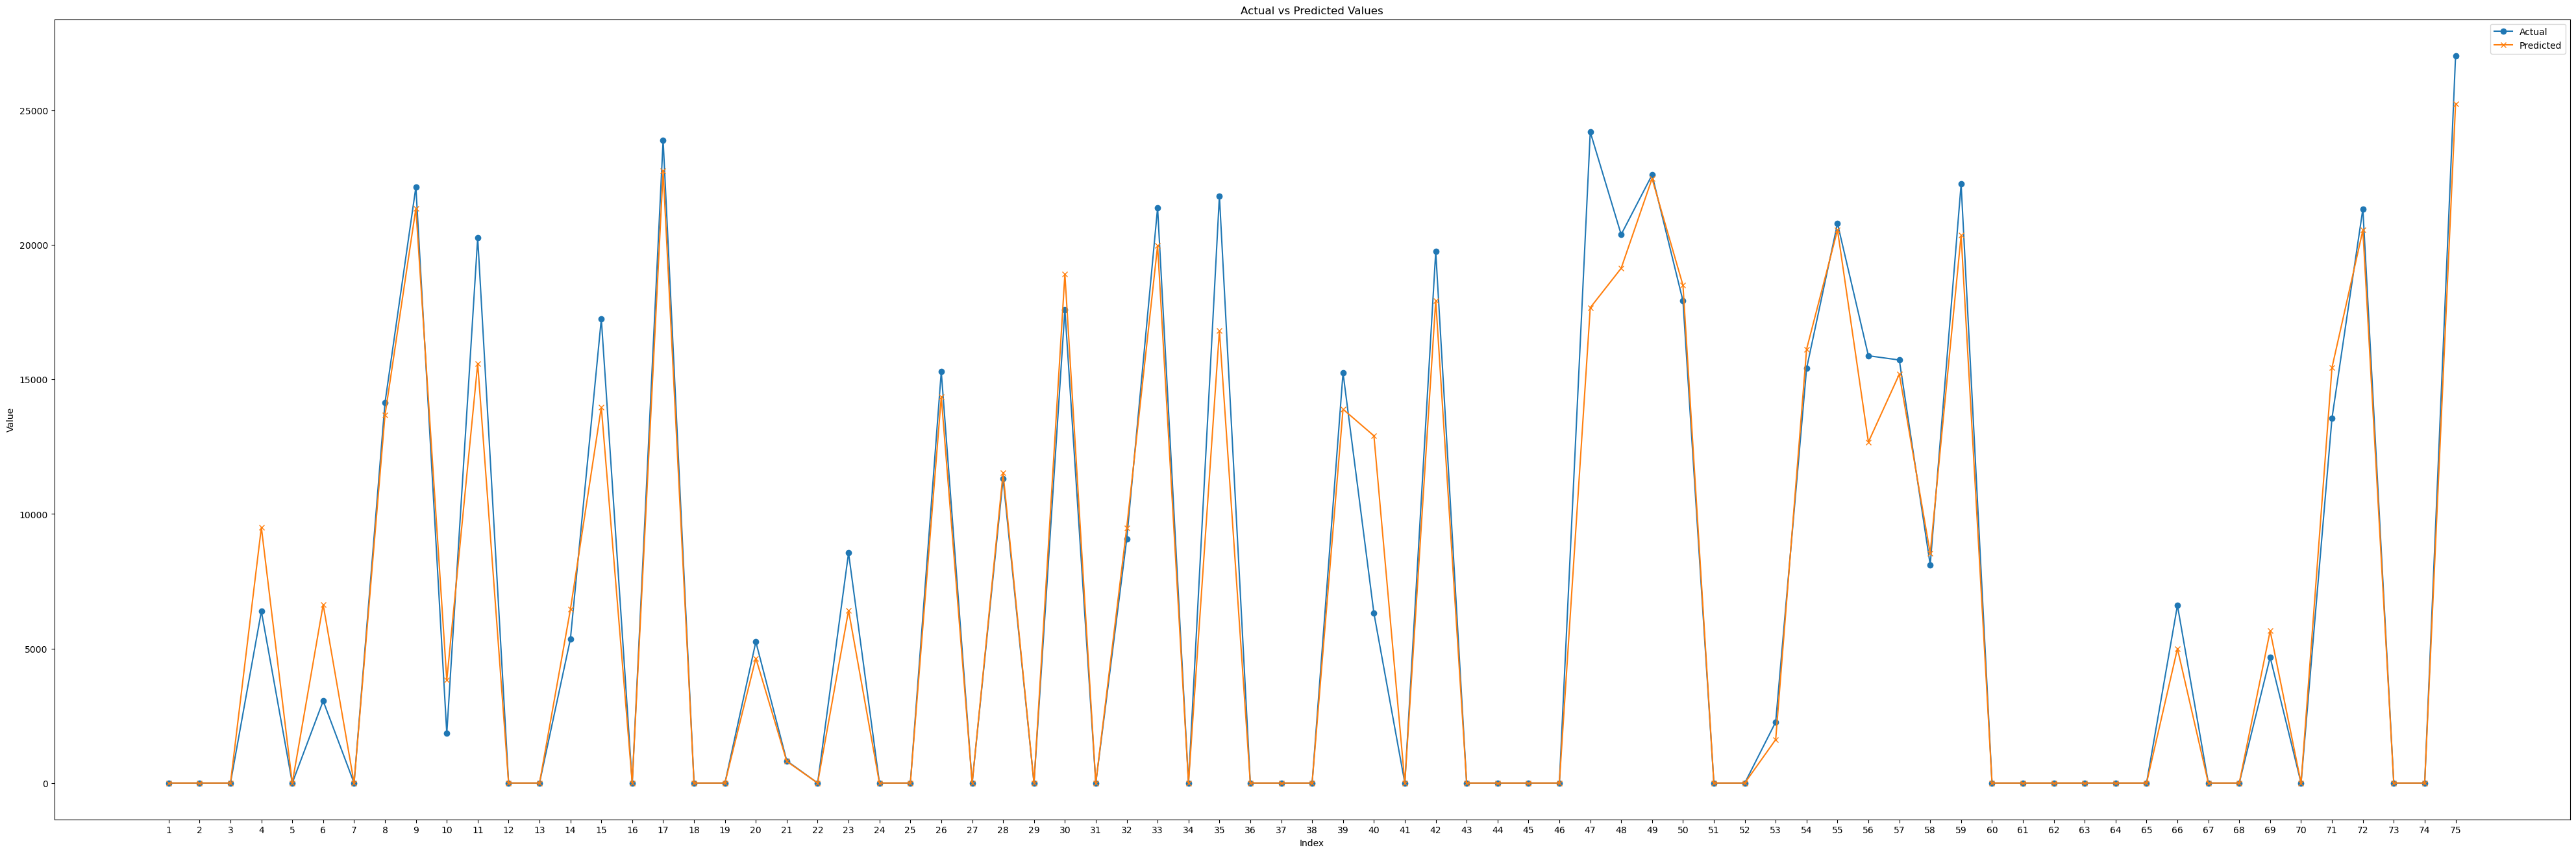

In [206]:
comparison_df= new_comparison_dfs.head(75)
plt.figure(figsize=(50, 16))
plt.plot(comparison_df['Index'], comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Index'], comparison_df['Predicted'], label='Predicted', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xticks(comparison_df['Index'])
plt.show()

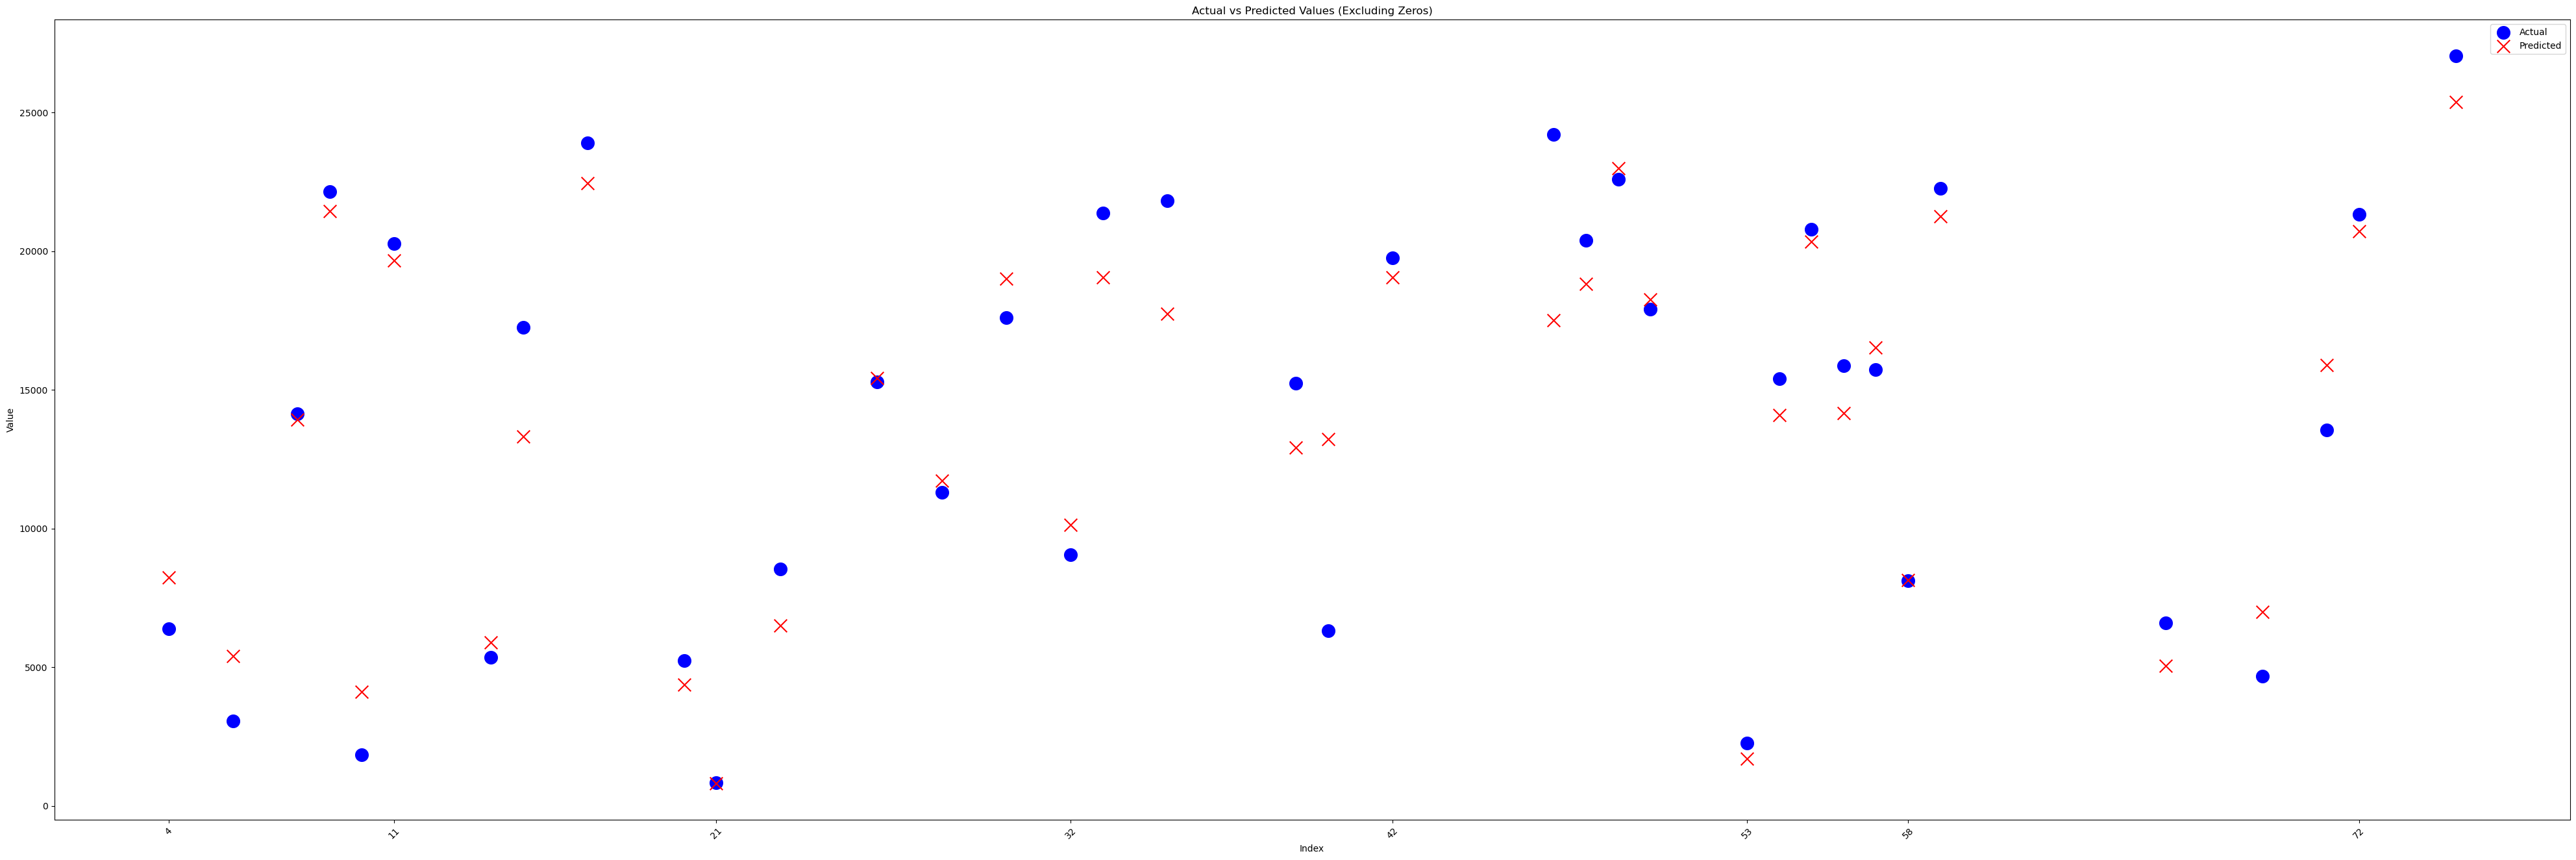

In [208]:

comparison_df = comparison_dfs.head(75)

# Filter out rows where 'Actual' or 'Predicted' are 0
filtered_df = comparison_df[(comparison_df['Actual'] != 0) & (comparison_df['Predicted'] != 0)]

plt.figure(figsize=(50, 16))

# Scatter plot for 'Actual' values with bold circular markers, excluding 0s
plt.scatter(filtered_df['Index'], filtered_df['Actual'], label='Actual', marker='o', s=200, color='blue')

# Scatter plot for 'Predicted' values with bold 'x' markers, excluding 0s
plt.scatter(filtered_df['Index'], filtered_df['Predicted'], label='Predicted', marker='x', s=200, color='red')

# Adding labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Excluding Zeros)')
plt.legend()

# Customize x-ticks if needed (e.g., every 5th tick)
plt.xticks(filtered_df['Index'][::5], rotation=45)

# Show the plot
plt.show()


                Feature  Importance
3                    HR    0.651061
4           Temperature    0.203536
11    Relative Humidity    0.052529
5         Precipitation    0.016548
12     Surface Pressure    0.014967
10    Specific Humidity    0.009310
2                    DY    0.009006
6            Wind Speed    0.008972
7        Wind Direction    0.008944
9   Wind Direction(50M)    0.008712
1                    MO    0.008172
8       Wind Speed(50M)    0.006371
0                  YEAR    0.001872


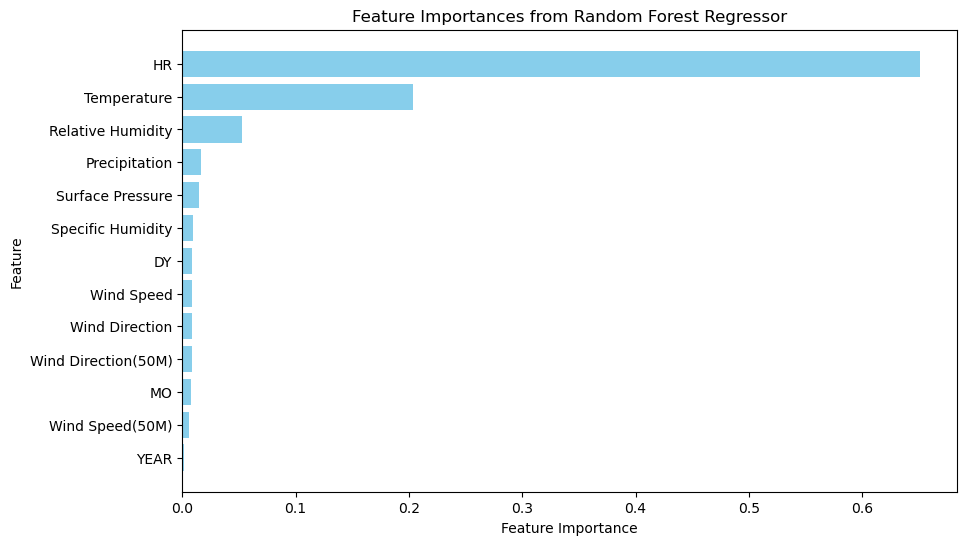

In [210]:

feature_importances = forest_reg.feature_importances_

feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [261]:
# tried with less features but still best performance is with all features
feature_columns = ['YEAR','MO','DY', 'HR', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction','Wind Speed(50M)', 'Wind Direction(50M)', 'Specific Humidity', 'Relative Humidity', 'Surface Pressure']
target_column = 'Avg Power'

X = merged_data[feature_columns]
y = merged_data[target_column]

In [263]:

# Assuming X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_forest)}")

Random Forest MSE: 3595923.770575374


In [265]:
# Save the DataFrame to a CSV file
merged_data.to_csv('/Users/roxoho/Downloads/Data-pv/csv-data/DATASET_V2.csv', index=False)
